<a href="https://colab.research.google.com/github/MaxGarnica/Trabajos_SimulacionII/blob/main/Ejercicios_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Maximiliano Garnica López*

*Ejercicios*

*Simulación II*

# **SEGUNDO PARCIAL**

In [93]:
import random
from matplotlib.pyplot import *
import numpy as np
import pandas as pd
import statistics
from math import inf as Infinity
from time import time
import math

## Ejercicio 1
Simulación manual.

1. Completar la tabla.

| Pkt No. |Tpll  |tps  |Tiempo de arribo|Inicio de servicio|Hora de salida|Tiempo en fila |Tiempo en el sistema  |
|---------|-----|----|--------------|-------------------|----------------|---------------|-----------------| 
|    1    |  2  | 12 |       2      |         2         |      14        |      0        |       12        |
|    2    |  5  | 10 |       7      |         14        |      24        |      7        |       17        | 
|    3    |  1  | 16 |       8       |     24              |   40             |  16             |      32           |
|    4    |  4  | 9  |     12         |    40               |    49            |      28         |      37           |
|    5    |  1  | 10 |      13        |        49           |    59            |      36         |       46          | 
|    6    |  3  | 13 |      16        |       59            |     72           |      43         |       56          |
|    7    |  3  | 17 |      19        |      72             |      89          |        53       |       70          | 
|    8    |  2  | 10 |      21        |        89           |      99          |       68        |        78         |
|    9    |  4  | 8  |      25        |        99           |      107          |        74       |      82           |
|   10    |  5  | 12 |     30         |        107           |     119           |       77        |         89        |

## Ejercicio 2

Continuacion...

1. Con la información de la tabla completa, determinar: $\lambda$, $\mu$, $L$ y $L_q$.

El número de llegadas por unidad de tiempo $\lambda$ se obtiene con el total de llegadas que fueron $10$ entre el tiempo total en el que ocurrieron esas llegadas $30$ minutos

In [2]:
lambd=10/30

print('Número de llegadas por unidad de tiempo es λ=%.2f' %lambd)

Número de llegadas por unidad de tiempo es λ=0.33


El número de servicios por unidad de tiempo $\mu$ se obtiene con el total de servicios que fueron $10$ entre el tiempo total donde se dieron los servicios que es desde el minuto $2$ hasta el $119$, obteniendo $117$ minutos.

In [3]:
mu=10/117

print('Número de servicios por unidad de tiempo es μ=%.2f' %mu)

Número de servicios por unidad de tiempo es μ=0.09


El número medio de clientes en el sistema $L$ se obtiene con la formula:

$L= \lambda W$

El valor de $\lambda$ ya lo tenemos. El de $W$ es el tiempo medio de estancia de los clientes en el sistema que se obtiene sacandole el promedio a la columna **Tiempo en el sistema**

In [4]:
tiempsist=[12,17,32,37,46,56,70,78,82,89]

W=mean(tiempsist)

print('El tiempo medio de estancia de los clientes en el sistema es W=%.2f' %W)

El tiempo medio de estancia de los clientes en el sistema es W=51.90


EL valor de $L$ es

In [5]:
L=lambd*W

print('El número medio de clientes en el sistema es L=%.2f' %L)

El número medio de clientes en el sistema es L=17.30


El número medio de clientes en la cola $L_q$ se obtiene con la formula:

$L_q = \lambda W_q$

El valor de $\lambda$ ya lo tenemos. El de $W_q$ es el tiempo medio de espera de los clientes en la cola que se obtiene sacandole el promedio a la columna **Tiempo en fila**

In [6]:
tiempfila=[0,7,16,28,36,43,53,68,74,77]

Wq=mean(tiempfila)

print('El tiempo medio de espera de los clientes en la cola es W_q=%.2f' %Wq)

El tiempo medio de espera de los clientes en la cola es W_q=40.20


EL valor de $L_q$ es

In [7]:
Lq=lambd*Wq

print('El número medio de clientes en la cola es L_q=%.2f' %Lq)

El número medio de clientes en la cola es L_q=13.40


## Ejercicio 3

**Variables:**

1. Variable de tiempo $t$: tiempo (simulado) transcurrido.

2. Variables de conteo: número de veces que ciertos eventos han ocurrido, hasta el instante $t$.
    
3. Variables de estado del sistema (ES): Describen el estado del sistema en el instante $t$.

Subrutina para generar $T_s$, el tiempo de la primera llegada después del instante s.

Paso 1: Sea $t = s$.

Paso 2: Generar $U$.

Paso 3: Sea $t = t - \frac{1}{\lambda} logU$.

Paso 4: Generar $U$.

Paso 5: Si $U \leq \frac{\lambda(t)}{\lambda}$, hacer $T_s = t$ y terminar.

Paso 6: Ir al paso 2.

1. Escribir el código para la subrutina que genera $T_s$.

In [8]:
s=2                                               #Tiempo promedio entre llegadas
i=0                                               #Variable de estado para terminar el ciclo
t=s                                               #Hora de simulación actual
while i==0 :
  r1=random.random()                              #Generar U~(0,1)
  t=t-(1/lambd)*np.log(r1)
  r2=random.random()                              #Generar U~(0,1)

  if (r2<=(random.expovariate(t)/lambd)):         #Si U<=λ(t)/λ
    Ts=t
    i=1                                           #Termina el ciclo
  
print('Ts = %f' %Ts)

Ts = 5.181323


## Ejercicio:

Lavado Automata para automóviles funciona sólo con un lugar. Los autos llegan siguiendo
una distribución de Poisson, con 4 autos por hora, que pueden esperar en el estacionamiento de
la instalación, si el lugar de lavado está ocupado. El tiempo para lavar y limpiar un automóvil
es exponencial, con 10 minutos de promedio. Los automóviles que no se pueden estacionar en
la instalación pueden esperar en el arrollo junto al lavado. Eso quiere decir que para todo fin
práctico no hay límite del tamaño del sistema. El gerente de la instalación desea determinar el
tamaño del estacionamiento.

Para resolver este problema, hay que determinar $L_q$, pero de momento estimemos $L$ y $W$ usando la simulación.

El número de autos que llegaron en una hora es $λ=4$

El número de servicios de autos por hora es de $μ= \frac{1}{10} \text{minutos} =\frac{60}{10} \text{horas}= 6$

In [9]:
# Parametros

lamda = 4.0                         # Razón de arrivos (1/Lambda)
mu = 6.0                            # Razón de salida (1/Mu)


Num_Pkts = 100                      # Numero de paquetes a simular
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = random.expovariate(lamda)     # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

t_evento_anterior = 0.0             # tiempo del último evento


# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales
Area = []                           # Area de escalón


while count < Num_Pkts:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        
        # Area del escalón
        Area.append((t - t_evento_anterior)*N)
        t_evento_anterior = t
        
        
        N = N + 1.0
        tll = t + random.expovariate(lamda) 
        if N == 1:
            ts = t + random.expovariate(mu)
    else:                                         # Evento de salida
        t = ts
        ts_Data.append(t)
        
        # Area del escalón
        Area.append((t - t_evento_anterior)*N)
        t_evento_anterior = t
        
        
        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + random.expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:

for i in range(Num_Pkts):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)

print( "Retraso promedio es W = ", round( mean(r_Data), 4) )
print( "E[ N(t)] = L = ", round(sum(Area)/t, 4))

Retraso promedio es W =  0.2965
E[ N(t)] = L =  1.0675


## Ejercicio 4

Calcular $L_q$ para el ejemplo anterior, usando las fórmulas de arriba.

El número medio de clientes en la cola $L_q$ se obtiene con la formula:

$L_q = \lambda W_q$

El valor de $\lambda$ ya lo tenemos. El de $W_q$ es el tiempo medio de espera de los clientes en la cola que se obtiene sacandole el promedio a todos **Tiempos en fila** que obtendremos con $\text{tll_Data}$ y $\text{ts_Data}$

In [10]:
# Tiempo de arribo ***********************************************************************************
ta_Data=[]
tar=0                                           

for i in range(Num_Pkts):
    tar = tar + tll_Data[i]                     #Tiempo de arribo = Tiempo de arribo anterior + Tiempo de llegada
    ta_Data.append(tar)

# Inicio de servicio ***********************************************************************************
Is_Data=[]
Iser=tll_Data[0]                                  #Tiempo de inicio de servicio inicial = Tiempo de llegada inicial
Is_Data.append(Iser)

for i in range(Num_Pkts):
    Iser = Iser + ts_Data[i]                     #Tiempo de inicio de servicio = Tiempo de inicio de servicio anterior + Tiempo de salida
    Is_Data.append(Iser)

# Tiempo en la fila ***********************************************************************************
Tf_Data=[]

for i in range(Num_Pkts):
    tfila = -Is_Data[i]+ta_Data[i]               #Tiempo en la fila = Tiempo de inicio de servicio - Tiempo de arribo
    Tf_Data.append(tfila)

#print(tll_Data)
#print(ts_Data)
#print(ta_Data)
#print(Is_Data)
#print(Tf_Data)

# Tiempo medio de espera de los clientes en la cola ***********************************************************************************

Wq1=mean(Tf_Data)

print('El tiempo medio de espera de los clientes en la cola es W_q=%.2f' %Wq1)

El tiempo medio de espera de los clientes en la cola es W_q=-3.63


In [11]:
Lq1=lamda*Wq1

print('El número medio de clientes en la cola es L_q=%.2f' %Lq1)

El número medio de clientes en la cola es L_q=-14.50


## Ejercicio 5

En una estación con un solo servidor llegan en promedio 45 clientes por hora. Se tiene capacidad para atender 
en promedio a 60 clientes por hora. Se sabe que los clientes esperan en promedio 3 minutos en la cola.
Se solicita determinar: 
* Tiempo promedio que un cliente pasa en el sistema. 
* Número promedio de clientes en la cola. 
* Número promedio de clientes en el Sistema en un momento dado.

Use la simulación para responder y luego verifique los resultados usando las fórmulas de arriba.

In [12]:
# Parametros

lamda = 45/60                       # Razón de arrivos (1/Lambda)
mu = 60/60                          # Razón de salida (1/Mu)


Num_Pkts = 100                      # Numero de paquetes a simular
count = 0                           # Contador de paquetes simulados
t = 0
N = 0                               # Variable de estado: numero de paquetes en el sistema

tll = random.expovariate(lamda)     # Tiempo de llegada
ts = Infinity                       # Tiempo de salida

t_evento_anterior = 0.0             # tiempo del último evento


# Variables de salida
tll_Data = []                       # Lista de tiempos de llegada
ts_Data = []                        # Lista de tiempos de salida
r_Data = []                         # Lista de retrasos individuales


while count < Num_Pkts:
    if tll < ts:                           # Evento de llegada
        t = tll
        tll_Data.append(t)
        
        t_evento_anterior = t
        
        N = N + 1.0
        tll = t + random.expovariate(lamda) 
        if N == 1:
            ts = t + random.expovariate(mu)
    else:                                         # Evento de salida
        t = ts
        ts_Data.append(t)

        t_evento_anterior = t

        N = N - 1.0
        count = count + 1                         # Paquetes simulados
        if N > 0:
            ts = t + random.expovariate(mu)
        else:
            ts = Infinity
            
# Estimación del retraso promedio:

for i in range(Num_Pkts):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)

print( "Tiempo promedio que un cliente pasa en el sistema es W = ", round( mean(r_Data), 4) )

# Tiempo medio de espera de los clientes en la cola
wq=3
lq=lamda*wq
print('El número medio de clientes en la cola es L_q=%.2f' %lq)

print( "Número promedio de clientes en el sistema E[ N(t)] = L = ", round(sum(Area)/t, 4))

Tiempo promedio que un cliente pasa en el sistema es W =  1.7459
El número medio de clientes en la cola es L_q=2.25
Número promedio de clientes en el sistema E[ N(t)] = L =  0.1724


## Ejercicio 6

¿Cómo accedemos al elemento 'c' de la lista [3, 'c'] dentro de lista?

In [13]:
lista = [1,2,3,4,5, 'a', 'b', 'c', [1,2], [3, 'c']]

elemento=lista[9]
print(elemento)

c=elemento[1]
print(c)

[3, 'c']
c


## Ejercicio 7

In [14]:
a = [1, 2, 3, 4, 5]
b = [6,7,8,9,10]

Calcular el promedio de:

* a

In [15]:
proma=sum(a)/len(a)                    #Promedio a = suma de las entradas de a entre la longitud de a
print('Promedio de a es %d' %proma)

Promedio de a es 3


* b

In [16]:
promb=sum(b)/len(b)                    #Promedio b = suma de las entradas de b entre la longitud de b
print('Promedio de b es %d' %promb)

Promedio de b es 8


* 5a ¿Es igual a 5*(promedio de a)?

In [17]:
mult1=5*a                               #Calculamos 5*a
print('5*a=%a\n' %mult1)

prom1=sum(mult1)/len(mult1)             #Promedio 5*a = suma de las entradas de 5*a entre la longitud de 5*a
print('\t Promedio 5*a es %d \n' %prom1)

mult2=5*proma                           #5*(Promedio a)
print('5*(promedio de a)=%d' %mult2)

5*a=[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

	 Promedio 5*a es 3 

5*(promedio de a)=15


No son iguales, ya que al multiplicar $5*a$ repites el arreglo $\text{a}$ $5$ veces en un nuevo arreglo lo que provoca que su promedio sea $3$ al igual que el promedio de $\text{a}$ y el segundo obtiene el promedio de a $3$ por $5$ que da $15$

* a + b ¿Es igual a la suma de los promedios?

In [18]:
sum1=a+b                                              #Calculamos a+b
print('a+b=%a \n' %sum1)

prom2=sum(sum1)/len(sum1)                             #Promedio a+b = suma de las entradas de a+b entre la longitud de a+b
print('\t Promedio a+b es %d \n' %prom2)

sum2=proma+promb                                      #(promedio de a)+(promedio de b)
print('(promedio de a)+(promedio de b)=%d' %sum2)

a+b=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

	 Promedio a+b es 5 

(promedio de a)+(promedio de b)=11


No son iguales, ya que al sumar $a+b$ pone los dos arreglos en uno solo lo que provoca que su promedio sea $5$ y el segundo obtiene la suma de los promedios de $\text{a}$ y $\text{b}$ lo que da $11$

## Ejercicio 8

1.  Generar una lista de 20 números aleatorios. 

In [19]:
numa=[]

for i in range(20):                 #Genera una lista de 20 números aleatorios
  numa.append(random.random())

print(numa)                         #Imprime lista de los 20 números aleatorios

[0.26559174519833983, 0.8546833833959777, 0.34678586509645626, 0.5752344824048037, 0.8950594376885197, 0.6372093884358194, 0.8814926833856378, 0.7919045026721154, 0.11612320029153111, 0.46853259697027594, 0.9610042890633094, 0.9288418660569507, 0.0016354902259086979, 0.0878917376814119, 0.00030662561258443244, 0.8105384987493647, 0.2116429901160316, 0.885840487329422, 0.7618062313202476, 0.14952661467785267]


2.   Obtener el promedio de los 10 últimos números generados.

In [20]:
ult10=numa[10:]                     #Toma los ultimos 10 números aleatorios
print(ult10)

promu=sum(ult10)/len(ult10)         #Obtiene  los ultimos 10 números aleatorios
print('\nPromedio de los ultimos 10 numeros generados es %f' %promu)

[0.9610042890633094, 0.9288418660569507, 0.0016354902259086979, 0.0878917376814119, 0.00030662561258443244, 0.8105384987493647, 0.2116429901160316, 0.885840487329422, 0.7618062313202476, 0.14952661467785267]

Promedio de los ultimos 10 numeros generados es 0.479903


## Función mm1_W( $λ$, $μ$, No. paquetes)

In [21]:
def mm1_W(lamda,mu,Num_Pkts):
  count = 0                           # Contador de paquetes simulados
  t = 0
  N = 0                               # Variable de estado: numero de paquetes en el sistema

  tll = random.expovariate(lamda)     # Tiempo de llegada
  ts = Infinity                       # Tiempo de salida

  t_evento_anterior = 0.0             # tiempo del último evento

  # Variables de salida
  tll_Data = []                       # Lista de tiempos de llegada
  ts_Data = []                        # Lista de tiempos de salida
  r_Data = []                         # Lista de retrasos individuales

  while count < Num_Pkts:
      if tll < ts:                                  # Evento de llegada
          t = tll
          tll_Data.append(t)
          
          t_evento_anterior = t
          
          N = N + 1.0
          tll = t + random.expovariate(lamda) 
          if N == 1:
              ts = t + random.expovariate(mu)
      else:                                         # Evento de salida
          t = ts
          ts_Data.append(t)

          t_evento_anterior = t

          N = N - 1.0
          count = count + 1                         # Paquetes simulados
          if N > 0:
              ts = t + random.expovariate(mu)
          else:
              ts = Infinity
              
  # Estimación del retraso promedio:

  for i in range(Num_Pkts):
      d = ts_Data[i] - tll_Data[i]
      r_Data.append(d)

  #   print( "Tiempo promedio que un cliente pasa en el sistema es W = ", round( mean(r_Data), 4) )

  # Tiempo medio de espera de los clientes en la cola
  wq=3
  lq=lamda*wq
  #   print('El número medio de clientes en la cola es L_q=%.2f' %lq)

  #   print( "Número promedio de clientes en el sistema E[ N(t)] = L = ", round(sum(Area)/t, 4))

  return r_Data             #Arreglo del tiempo que permanecen los clientes en el sistema

In [22]:
print( "Tiempo promedio que un cliente pasa en el sistema es W = ", round( mean(mm1_W(4.0,6.0,100)), 4) )

Tiempo promedio que un cliente pasa en el sistema es W =  0.4104


Analizar visualmente la variabilidad de los resultados que se obtienen al repetir muchas veces el experimento.

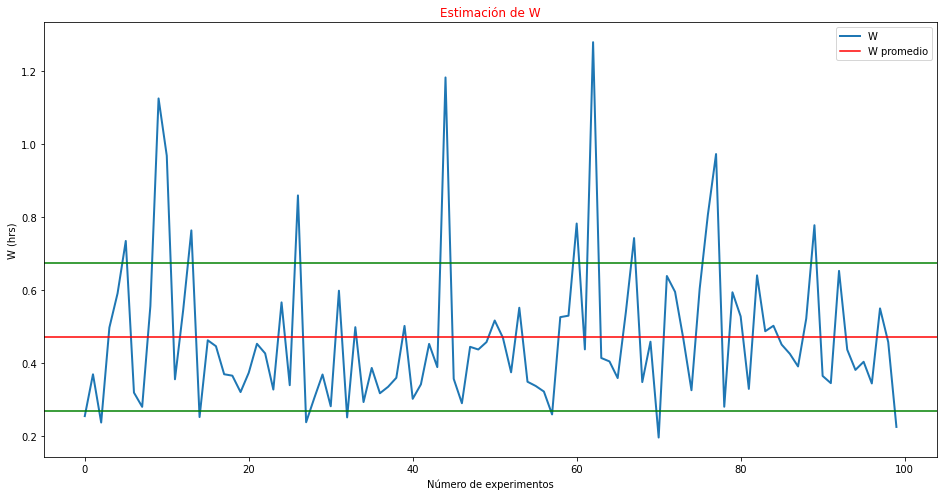

Retraso promedio W =  0.4725
Con un error de = 0.2032
W está entre: 0.2694 y 0.6757


In [23]:
lamda = 4.0
mu = 6.0

Num_Rep = 100                       # Numero de repeticiones
Delay = []                          # Lista de resultados para el retraso promedio W 

for i in range(Num_Rep):
    random.seed() 
    d = mean(mm1_W(4.0,6.0,100))    # Tiempo promedio que un cliente pasa en el sistema
    Delay.append(d)

# Estimación del promedio de las repeticiones

fig = figure(1, figsize=(16,8))
plot(Delay, linewidth=2, label='W')
axhline(y=mean(Delay), color='red',label='W promedio')
axhline(y=mean(Delay) + pstdev(Delay), color='green')
axhline(y=mean(Delay) - pstdev(Delay), color='green')
title("Estimación de W", color = 'red')
xlabel('Número de experimentos')
ylabel('W (hrs)')
legend()
show()


print("Retraso promedio W = " , round( mean(Delay), 4) )
print("Con un error de =", round(pstdev(Delay), 4))
print("W está entre:" , round(mean(Delay) - pstdev(Delay), 4), "y", round(mean(Delay) + pstdev(Delay), 4) )

## Función Probabilidad pmm1_W( $λ$, $μ$, No. paquetes)

In [24]:
def pmm1_W(lamda,mu,Num_Pkts):
  count = 0                           # Contador de paquetes simulados
  t = 0
  N = 0                               # Variable de estado: numero de paquetes en el sistema

  tll = random.expovariate(lamda)     # Tiempo de llegada
  ts = Infinity                       # Tiempo de salida
  t_evento_anterior = 0.0             # tiempo del último evento

  # Variables de salida
  tll_Data = []                       # Lista de tiempos de llegada
  ts_Data = []                        # Lista de tiempos de salida
  r_Data = []                         # Lista de retrasos individuales

  Data = {}                           # Diccionario

  while count < Num_Pkts:
  #while t < T:
      if tll < ts:                                 # Evento de llegada
          t = tll
          
          # Longitud del intervalo entre llegadas
          delta = t - t_evento_anterior
          if N in Data: 
              Data[N] += delta
          else:
              Data[N] = delta
          t_evento_anterior = t
          
          tll_Data.append(t)
          N = N + 1.0
          tll = t + random.expovariate(lamda) 
          if N == 1:
              ts = t + random.expovariate(mu)
      else:                                         # Evento de salida
          t = ts
          
          # Longitud del intervalo de tiempo
          delta = t - t_evento_anterior
          if N in Data:
              Data[N] += delta
          else:
              Data[N] = delta
          t_evento_anterior = t
          
          ts_Data.append(t)
          N = N - 1.0
          count = count + 1                         # Paquetes simulados
          if N > 0:
              ts = t + random.expovariate(mu)
          else:
              ts = Infinity

  ##################################### se procesan los datos de salida ########################################

  # Estimación de la probabilidad de P(N=k):
  for (key, value) in Data.items():
      Data[key] = value/t

  # Se verifica que la probabilidad total es 1.0

  print('Suma de probabilidades =', sum(Data.values()))

  # Se verifican los valores de expectación
  media = 0.0

  print('\n')
  print('Lista de Probabilidades\n')
  print('No. Llegadas','\t','Probabilidad')
  for (key, value) in Data.items():
      media = media + key*value
      print(key,'\t\t', round(value, 4))

  print('\n')
  print('E[N] = ', media)

In [25]:
pmm1_W(4.0,6.0,100)

Suma de probabilidades = 0.9999999999999998


Lista de Probabilidades

No. Llegadas 	 Probabilidad
0 		 0.46
1.0 		 0.3167
2.0 		 0.1302
3.0 		 0.0779
4.0 		 0.006
5.0 		 0.0084
6.0 		 0.0007


E[N] =  0.8811476697885513


## Función generamos las muestras/repeticiones (Estado transitorio y estado estable)

In [26]:
def mm1_W_cum(lamda, mu, Num_Pkts):
    Delay = mm1_W(lamda, mu, Num_Pkts)
    Delay_Cum = []
    for i in range(Num_Pkts):
        Delay_Cum.append( sum(Delay[0:i+1])/(i+1) )

    return Delay_Cum

## Ejercicio 9

Método de Welch

Elija el punto de corte, agregue las líneas de código necesarias para graficar una línea vertical y rotular el punto de corte.

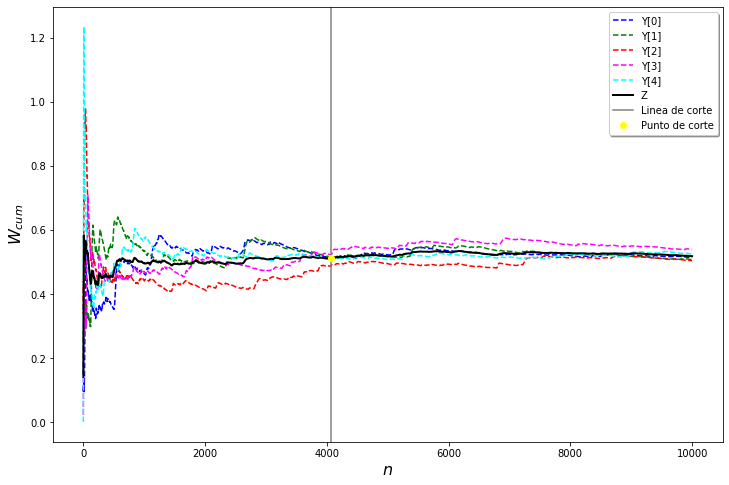

In [160]:
lamda = 4.0
mu = 6.0

n = 10000                         # Número de clientes/paquetes simulados
R = 5                             # Número de repeticiones

Y =  np.zeros( shape = (R, n) )   # Variable de salida W
W=[]

# Generamos las muestras/repeticiones
for i in range(R):
    random.seed()
    Y[i] = mm1_W_cum(lamda, mu, n)

# Calculamos la media
Z = []
for i in range(n):
    Z.append( sum(Y[:,i]) / R )

# Punto de corte
# Calcularemos la menor diferencia entre las graficas
p=0
for j in range(n):                        # Recorre los n puntos de la lista
  
  for i in range(R):                      # Recorre las R graficas
    dif=Z[j]-Y[i,j]                       # Obtiene la diferencia del elemento j de Z entre la del lemento j de Y[i]
    
    if dif<0.0001:                        # Toma las diferencias menores de 0.0001
      w=j                                 
      W.append(w)                         # Agrega el número j a la lista W para saber en que puntos tiene menores diferencias
    
    if W.count(j)==4 and p<(n/5):         # Toma los valores j que se encuentran en W cuatro veces despues de n/5 para tener una mejor aproximación del punto de corte
      xv=j
      p=p+1

#print(W,'\n', len(W), xv)

# Graficamos Y y Z
fig = figure(1, figsize=(12, 8))
plot(Y[0], "k--", label="Y[0]", color='blue')
plot(Y[1], "k--", label="Y[1]", color='green')
plot(Y[2], "k--", label="Y[2]", color='red')
plot(Y[3], "k--", label="Y[3]", color='magenta')
plot(Y[4], "k--", label="Y[4]", color='cyan')
plot(Z, "k", linewidth=2, label="Z")
axvline(xv, ymin=0, ymax=1, label="Linea de corte", color='gray')           # Linea vertical del punto de corte
plot(xv,Z[xv],"o",label="Punto de corte",color="yellow")                    # Punto de corte

xlabel("$n$", size=16)
ylabel("$W_{cum}$", size=16)
legend(loc='upper right', shadow=True)
show()

## Funcion de prueba de corridas

In [28]:
l= [946,1058,1133,869,927,742,1113,665,955,1288,1074,838,815,910,1193,
    1386,955,1187,891,1302,867,837,1138,868,969,737,1143,947,763,1029]

In [29]:
def prueba_corridas(l):   # Prueba de corridas donde regresa los estadisticos 
    
    l_median = mean(l)    # Hacemos la prueba respecto a la media/mediana
    
    R, n1, n2 = 1, 0, 0   # iniciamos los contadores
        
    for i in range(len(l)):    
        
        # Aumentamos R cuando 2 entradas están una arriba y otra abajo de la media/mediana:
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            R += 1
        # Contamos las que están arriba y las que están abajo
        if(l[i]) >= l_median:
            n1 += 1
        else:
            n2 += 1   
    # calculamos los parámetros y el estadistico
    R_exp = ((2*n1*n2)/(n1+n2))+1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
  
    z = (R - R_exp)/stan_dev
  
    return R, n1, n2, R_exp, z, stan_dev 

In [30]:
R = prueba_corridas(l)[0]
n1 = prueba_corridas(l)[1]
n2 = prueba_corridas(l)[2]
R_exp = abs(prueba_corridas(l)[3])
Z = abs(prueba_corridas(l)[4]) 
stan_dev = abs(prueba_corridas(l)[5])

print('Estadistico = ', Z)
print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

Estadistico =  1.3956221530306299
  R =  19   R_exp =  15.4 
 n1 =  12 
 n2 =  18 
Varianza =  6.653793103448275


## Ejercicio 10

*   Completar la función para que imprima todas las salidas de interés.

In [31]:
def prueba_corridas_impr(l):   # Prueba de corridas donde imprime los estadisticos
    
    l_median = mean(l)         # Hacemos la prueba respecto a la media/mediana
    
    R, n1, n2 = 1, 0, 0        # iniciamos los contadores
        
    for i in range(len(l)):    
        
        # Aumentamos R cuando 2 entradas están una arriba y otra abajo de la media/mediana:
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            R += 1
        # Contamos las que están arriba y las que están abajo
        if(l[i]) >= l_median:
            n1 += 1
        else:
            n2 += 1   
    # calculamos los parámetros y el estadistico
    R_exp = ((2*n1*n2)/(n1+n2))+1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
  
    z = (R - R_exp)/stan_dev

    print('Estadistico = ', z)
    print('  R = ', R, '  R_exp = ', R_exp, '\n n1 = ', n1, '\n n2 = ', n2, '\nVarianza = ', stan_dev**2)

In [32]:
prueba_corridas_impr(l)

Estadistico =  1.3956221530306299
  R =  19   R_exp =  15.4 
 n1 =  12 
 n2 =  18 
Varianza =  6.653793103448275


*   Desordenar la lista y volver a aplicar la prueba de corridas. Comparar el resultado.

In [33]:
dl=[]
dl=l
random.shuffle(dl)            # Desordenar la lista l

print("dl =",dl)              # Imprimir la lista l desordenada

print('\n')
prueba_corridas_impr(dl)      # Prueba de corridas de la lista l desordenada

dl = [1302, 1187, 838, 955, 869, 837, 737, 1113, 1288, 910, 955, 763, 1138, 665, 867, 1386, 1133, 946, 947, 1058, 969, 927, 742, 1143, 1029, 815, 1074, 1193, 891, 868]


Estadistico =  -0.15506912811451457
  R =  15   R_exp =  15.4 
 n1 =  12 
 n2 =  18 
Varianza =  6.653793103448275


Los estadisticos de la lista $l$ original y la desordenada son los mismos, por lo que **el orden de los elementos que componen una lista no afectan los estadisticos:** 

*Estadistico de prueba (Z)*, *Número de corridas (R)*, *Número de corridas esperadas (R_exp)*, *Varianza del número de corridas ($S^2$)*, *$n_1$ Número de valores positivos de la serie* y *$n_2$ número de valores negativos de la serie*.


*   Repetir el ejercicio con la lista l_1

In [34]:
l_1 = [0.809, 0.042,  0.432,  0.538,  0.225,  0.88,  0.688,  0.772,  0.036,  0.854, 0.397,  0.268,  0.821,  0.897,  
     0.07,  0.721,  0.087,  0.35,  0.779,  0.482, 0.136,  0.855,  0.453,  0.197,  0.444,  0.799,  0.809,  0.691,  
     0.545,  0.857, 0.692,  0.055,  0.348, 0.373,  0.436,  0.29,  0.015,  0.834,  0.599,  0.724,  0.564,  0.709,  
     0.946,  0.754,  0.677,  0.128,  0.012,  0.498,  0.6,  0.913]

In [35]:
prueba_corridas_impr(l_1)

print('\n')
print('Desordenar la lista l_1 \n')
dl_1=[]
dl_1=l_1
random.shuffle(dl_1)              # Desordenar la lista l_1

print("dl_1 =",dl_1)              # Imprimir la lista l_1 desordenada

print('\n')
prueba_corridas_impr(dl_1)        # Prueba de corridas de la lista l_1 desordenada

Estadistico =  -1.3922411963646792
  R =  21   R_exp =  25.84 
 n1 =  27 
 n2 =  23 
Varianza =  12.085420408163268


Desordenar la lista l_1 

dl_1 = [0.268, 0.913, 0.854, 0.136, 0.946, 0.809, 0.809, 0.721, 0.88, 0.055, 0.036, 0.482, 0.857, 0.436, 0.599, 0.754, 0.564, 0.498, 0.042, 0.779, 0.724, 0.012, 0.545, 0.087, 0.692, 0.709, 0.688, 0.197, 0.821, 0.897, 0.07, 0.128, 0.015, 0.35, 0.538, 0.373, 0.691, 0.225, 0.799, 0.6, 0.29, 0.834, 0.348, 0.855, 0.453, 0.677, 0.444, 0.397, 0.432, 0.772]


Estadistico =  1.4842902010830052
  R =  31   R_exp =  25.84 
 n1 =  27 
 n2 =  23 
Varianza =  12.085420408163268


Como lo vimos en el inciso anterior no cambian los estadisticos.

## Ejercicio 11

Estimemos el valor de la integral $\int_0^1{\sqrt{arctan(x)}dx}$


Modificar el ejercicio ya realizado para obtener una estimación de la integral y una medida de su bondad

In [36]:
#Definimos la función de a integrar.
def funcion(x):
    return np.sqrt(np.arctan(x))                          # Regresa la raiz del arco tangente de [0,1]

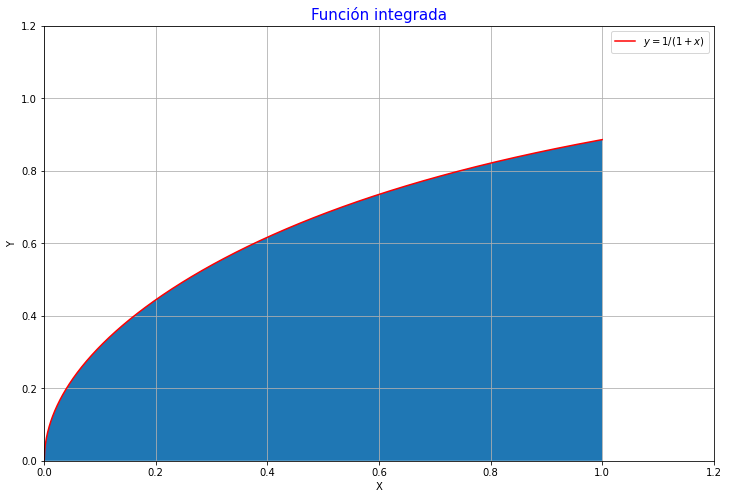

In [37]:
#Graficamos la función integrada.
fig = figure(1, figsize=(12, 8))
X=np.linspace(0,1,1000)                                   # Vector de [0,1] con 1000 divisiones
plot(X,funcion(X), color='red', label="$y=1/(1+x)$")      # Grafica de la integral de raiz del arco tangente de [0,1]
fill_between(X,funcion(X))                                # Rellena la grafica de la integral de raiz del arco tangente de [0,1]
legend()
xlim(0.0, 1.2)
ylim(0.0, 1.2)
grid(True)
title('Función integrada', color='b', size=15)
xlabel('X')
ylabel('Y')
show()

In [38]:
def integ(func, n):                # Necesita una funcion y un limite n de puntos a obtener
    ord=[]                              # Arreglo para guardar los valores de x
    abs=[]                              # Arreglo para guardar los valores de y evaluados en x
    for i in range(n):
        u= np.random.random_sample()    # Obtiene un vanlor random de x de [0,1]
        ord.append(u)                   # Igresa el valor de x obtenido al arreglo ord
        y=func(u)                       # Evalua el valor x obtenido en la funcion y
        abs.append(y)                   # Igresa el valor de y obtenido al arreglo abs 

    return np.mean(abs), np.std(abs)/np.sqrt(n)     # Regresa el valor de la integral y el error estandar

print("El valor de la integral es:", round(integ(funcion,1000)[0],5))
print("El error estándar es:", round(integ(funcion,1000)[1],5))

El valor de la integral es: 0.62335
El error estándar es: 0.00649


## Ejercicio 12

1.   Hacer una función que devuelva el intervalo de confianza.


In [148]:
def t_student(gl,alp):            # Función para obtener el valor t-student (grados de libertad, alpha)

    if gl>100:
      gl=101

    #gl - 0.5 - 0.2 - 0.1 - 0.05 - 0.02 - 0.01
    tstud=[[1, 1.0000, 3.0777, 6.3137, 12.7062, 31.8210, 63.6559],
    [2, 0.8165, 1.8856, 2.9200, 4.3027, 6.9645, 9.9250],
    [3, 0.7649, 1.6377, 2.3534, 3.1824, 4.5407, 5.8408],
    [4, 0.7407, 1.5332, 2.1318, 2.7765, 3.7469, 4.6041],
    [5, 0.7267, 1.4759, 2.0150, 2.5706, 3.3649, 4.0321],
    [6, 0.7176, 1.4398, 1.9432, 2.4469, 3.1427, 3.7074],
    [7, 0.7111, 1.4149, 1.8946, 2.3646, 2.9979, 3.4995],
    [8, 0.7064, 1.3968, 1.8595, 2.3060, 2.8965, 3.3554],
    [9, 0.7027, 1.3830, 1.8331, 2.2622, 2.8214, 3.2498],
    [10, 0.6998, 1.3722, 1.8125, 2.2281, 2.7638, 3.1693],
    [11, 0.6974, 1.3634, 1.7959, 2.2010, 2.7181, 3.1058],
    [12, 0.6955, 1.3562, 1.7823, 2.1788, 2.6810, 3.0545],
    [13, 0.6938, 1.3502, 1.7709, 2.1604, 2.6503, 3.0123],
    [14, 0.6924, 1.3450, 1.7613, 2.1448, 2.6245, 2.9768],
    [15, 0.6912, 1.3406, 1.7531, 2.1315, 2.6025, 2.9467],
    [16, 0.6901, 1.3368, 1.7459, 2.1199, 2.5835, 2.9208],
    [17, 0.6892, 1.3334, 1.7396, 2.1098, 2.5669, 2.8982],
    [18, 0.6884, 1.3304, 1.7341, 2.1009, 2.5524, 2.8784],
    [19, 0.6876, 1.3277, 1.7291, 2.0930, 2.5395, 2.8609],
    [20, 0.6870, 1.3253, 1.7247, 2.0860, 2.5280, 2.8453],
    [21, 0.6864, 1.3232, 1.7207, 2.0796, 2.5176, 2.8314],
    [22, 0.6858, 1.3212, 1.7171, 2.0739, 2.5083, 2.8188],
    [23, 0.6853, 1.3195, 1.7139, 2.0687, 2.4999, 2.8073],
    [24, 0.6848, 1.3178, 1.7109, 2.0639, 2.4922, 2.7970],
    [25, 0.6844, 1.3163, 1.7081, 2.0595, 2.4851, 2.7874],
    [26, 0.6840, 1.3150, 1.7056, 2.0555, 2.4786, 2.7787],
    [27, 0.6837, 1.3137, 1.7033, 2.0518, 2.4727, 2.7707],
    [28, 0.6834, 1.3125, 1.7011, 2.0484, 2.4671, 2.7633],
    [29, 0.6830, 1.3114, 1.6991, 2.0452, 2.4620, 2.7564],
    [30, 0.6828, 1.3104, 1.6973, 2.0423, 2.4573, 2.7500],
    [31, 0.6825, 1.3095, 1.6955, 2.0395, 2.4528, 2.7440],
    [32, 0.6822, 1.3086, 1.6939, 2.0369, 2.4487, 2.7385],
    [33, 0.6820, 1.3077, 1.6924, 2.0345, 2.4448, 2.7333],
    [34, 0.6818, 1.3070, 1.6909, 2.0322, 2.4411, 2.7284],
    [35, 0.6816, 1.3062, 1.6896, 2.0301, 2.4377, 2.7238],
    [36, 0.6814, 1.3055, 1.6883, 2.0281, 2.4345, 2.7195],
    [37, 0.6812, 1.3049, 1.6871, 2.0262, 2.4314, 2.7154],
    [38, 0.6810, 1.3042, 1.6860, 2.0244, 2.4286, 2.7116],
    [39, 0.6808, 1.3036, 1.6849, 2.0227, 2.4258, 2.7079],
    [40, 0.6807, 1.3031, 1.6839, 2.0211, 2.4233, 2.7045],
    [41, 0.6805, 1.3025, 1.6829, 2.0195, 2.4208, 2.7012],
    [42, 0.6804, 1.3020, 1.6820, 2.0181, 2.4185, 2.6981],
    [43, 0.6802, 1.3016, 1.6811, 2.0167, 2.4163, 2.6951],
    [44, 0.6801, 1.3011, 1.6802, 2.0154, 2.4141, 2.6923],
    [45, 0.6800, 1.3007, 1.6794, 2.0141, 2.4121, 2.6896],
    [46, 0.6799, 1.3002, 1.6787, 2.0129, 2.4102, 2.6870],
    [47, 0.6797, 1.2998, 1.6779, 2.0117, 2.4083, 2.6846],
    [48, 0.6796, 1.2994, 1.6772, 2.0106, 2.4066, 2.6822],
    [49, 0.6795, 1.2991, 1.6766, 2.0096, 2.4049, 2.6800],
    [50, 0.6794, 1.2987, 1.6759, 2.0086, 2.4033, 2.6778],
    [51, 0.6793, 1.2984, 1.6753, 2.0076, 2.4017, 2.6757],
    [52, 0.6792, 1.2980, 1.6747, 2.0066, 2.4002, 2.6737],
    [53, 0.6791, 1.2977, 1.6741, 2.0057, 2.3988, 2.6718],
    [54, 0.6791, 1.2974, 1.6736, 2.0049, 2.3974, 2.6700],
    [55, 0.6790, 1.2971, 1.6730, 2.0040, 2.3961, 2.6682],
    [56, 0.6789, 1.2969, 1.6725, 2.0032, 2.3948, 2.6665],
    [57, 0.6788, 1.2966, 1.6720, 2.0025, 2.3936, 2.6649],
    [58, 0.6787, 1.2963, 1.6716, 2.0017, 2.3924, 2.6633],
    [59, 0.6787, 1.2961, 1.6711, 2.0010, 2.3912, 2.6618],
    [60, 0.6786, 1.2958, 1.6706, 2.0003, 2.3901, 2.6603],
    [61, 0.6785, 1.2956, 1.6702, 1.9996, 2.3890, 2.6589],
    [62, 0.6785, 1.2954, 1.6698, 1.9990, 2.3880, 2.6575],
    [63, 0.6784, 1.2951, 1.6694, 1.9983, 2.3870, 2.6561],
    [64, 0.6783, 1.2949, 1.6690, 1.9977, 2.3860, 2.6549],
    [65, 0.6783, 1.2947, 1.6686, 1.9971, 2.3851, 2.6536],
    [66, 0.6782, 1.2945, 1.6683, 1.9966, 2.3842, 2.6524],
    [67, 0.6782, 1.2943, 1.6679, 1.9960, 2.3833, 2.6512],
    [68, 0.6781, 1.2941, 1.6676, 1.9955, 2.3824, 2.6501],
    [69, 0.6781, 1.2939, 1.6672, 1.9949, 2.3816, 2.6490],
    [70, 0.6780, 1.2938, 1.6669, 1.9944, 2.3808, 2.6479],
    [71, 0.6780, 1.2936, 1.6666, 1.9939, 2.3800, 2.6469],
    [72, 0.6779, 1.2934, 1.6663, 1.9935, 2.3793, 2.6458],
    [73, 0.6779, 1.2933, 1.6660, 1.9930, 2.3785, 2.6449],
    [74, 0.6778, 1.2931, 1.6657, 1.9925, 2.3778, 2.6439],
    [75, 0.6778, 1.2929, 1.6654, 1.9921, 2.3771, 2.6430],
    [76, 0.6777, 1.2928, 1.6652, 1.9917, 2.3764, 2.6421],
    [77, 0.6777, 1.2926, 1.6649, 1.9913, 2.3758, 2.6412],
    [78, 0.6776, 1.2925, 1.6646, 1.9908, 2.3751, 2.6403],
    [79, 0.6776, 1.2924, 1.6644, 1.9905, 2.3745, 2.6395],
    [80, 0.6776, 1.2922, 1.6641, 1.9901, 2.3739, 2.6387],
    [81, 0.6775, 1.2921, 1.6639, 1.9897, 2.3733, 2.6379],
    [82, 0.6775, 1.2920, 1.6636, 1.9893, 2.3727, 2.6371],
    [83, 0.6775, 1.2918, 1.6634, 1.9890, 2.3721, 2.6364],
    [84, 0.6774, 1.2917, 1.6632, 1.9886, 2.3716, 2.6356],
    [85, 0.6774, 1.2916, 1.6630, 1.9883, 2.3710, 2.6349],
    [86, 0.6774, 1.2915, 1.6628, 1.9879, 2.3705, 2.6342],
    [87, 0.6773, 1.2914, 1.6626, 1.9876, 2.3700, 2.6335],
    [88, 0.6773, 1.2912, 1.6624, 1.9873, 2.3695, 2.6329],
    [89, 0.6773, 1.2911, 1.6622, 1.9870, 2.3690, 2.6322],
    [90, 0.6772, 1.2910, 1.6620, 1.9867, 2.3685, 2.6316],
    [91, 0.6772, 1.2909, 1.6618, 1.9864, 2.3680, 2.6309],
    [92, 0.6772, 1.2908, 1.6616, 1.9861, 2.3676, 2.6303],
    [93, 0.6771, 1.2907, 1.6614, 1.9858, 2.3671, 2.6297],
    [94, 0.6771, 1.2906, 1.6612, 1.9855, 2.3667, 2.6291],
    [95, 0.6771, 1.2905, 1.6611, 1.9852, 2.3662, 2.6286],
    [96, 0.6771, 1.2904, 1.6609, 1.9850, 2.3658, 2.6280],
    [97, 0.6770, 1.2903, 1.6607, 1.9847, 2.3654, 2.6275],
    [98, 0.6770, 1.2903, 1.6606, 1.9845, 2.3650, 2.6269],
    [99, 0.6770, 1.2902, 1.6604, 1.9842, 2.3646, 2.6264],
    [100, 0.6770, 1.2901, 1.6602, 1.9840, 2.3642, 2.6259],
    [101, 0.6745, 1.2816, 1.6449, 1.9600, 2.3263, 2.5758]]
    
    if alp==0.5:
      at=1
    if alp==0.2:
      at=2
    if alp==0.1:
      at=3
    if alp==0.05:
      at=4
    if alp==0.02:
      at=5
    if alp==0.01:
      at=6

    return tstud[gl-1][at]

In [149]:
t_student(2,0.05)

4.3027

In [150]:
def int_conf(muestra,alpha):       # intervalo de confianza con nivel de confianza 50%, 80%, 90%, 95%, 98% y 99%
  n=len(muestra)                   # cantidad de datos
  mean=statistics.mean(muestra)    # media muestral
  s=statistics.stdev(muestra)      # desviacion estandar muestral

  t=t_student(n-1,alpha)           # usando la funcion que da los valores t-student con(grados de libertad=n-1,alpha)

  # usamos las formulas
  ic1 = mean - t*(s/math.sqrt(n))     
  ic2 = mean + t*(s/math.sqrt(n))

  print("Intervalo de confianza:(", round(ic1, 2),",", round(ic2, 2),")")

In [151]:
muestra1 = [3.2, 3, 2.8, 2.9, 3.1]

int_conf(muestra1,0.05)

Intervalo de confianza:( 2.8 , 3.2 )


2.   Calcular los intervalos de confianza a 80, 90, 95, 98 y 99% con la muestra: $\{3.33,3.15,2.91,3.05,2.75\}$

In [152]:
muestra=[3.33,3.15,2.91,3.05,2.75]

*   Intervalo de confianza del $80\%$

In [153]:
int_conf(muestra,0.2)

Intervalo de confianza:( 2.89 , 3.19 )


*   Intervalo de confianza del $90\%$

In [154]:
int_conf(muestra,0.1)

Intervalo de confianza:( 2.83 , 3.25 )


*   Intervalo de confianza del $95\%$

In [155]:
int_conf(muestra,0.05)

Intervalo de confianza:( 2.76 , 3.31 )


*   Intervalo de confianza del $98\%$

In [156]:
int_conf(muestra,0.02)

Intervalo de confianza:( 2.67 , 3.41 )


*   Intervalo de confianza del $99\%$

In [157]:
int_conf(muestra,0.01)

Intervalo de confianza:( 2.58 , 3.5 )
